## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [52]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
# We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [53]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [54]:
print("There are {} rows in the dataset.".format(df.shape[0]))

There are 294478 rows in the dataset.


c. The number of unique users in the dataset.

In [55]:
print("There are {} unique users in the dataset.".format(df['user_id'].nunique()))

There are 290584 unique users in the dataset.


d. The proportion of users converted.

In [56]:
prop_converted = df.query("converted == 1").user_id.nunique() / df.user_id.nunique()
print("The proportion of users converted is {0:.2%}".format(prop_converted))

The proportion of users converted is 12.10%


e. The number of times the `new_page` and `treatment` don't match.

In [57]:
n_mismatch = df.query("(group == 'treatment' and landing_page != 'new_page') or (group != 'treatment' and landing_page == 'new_page')").user_id.nunique()
print("There are {} times that new_page and treatment do not match.".format(n_mismatch))

There are 3893 times that new_page and treatment do not match.


f. Do any of the rows have missing values?

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [59]:
print("There is no missing values in the dataset.")

There is no missing values in the dataset.


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [60]:
df_todrop_index = df.query("(group == 'treatment' and landing_page != 'new_page') or (group != 'treatment' and landing_page == 'new_page')").index

In [61]:
# Remove 3,893 rows where treatment does not match with new_page or control does not match with old_page:
df2 = df.drop(df_todrop_index)

In [62]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [63]:
print("There are {} unique user_ids in df2.".format(df2.user_id.nunique()))

There are 290584 unique user_ids in df2.


b. There is one **user_id** repeated in **df2**.  What is it?

In [64]:
df2.user_id[df2.duplicated(['user_id'], keep = False)]

1899    773192
2893    773192
Name: user_id, dtype: int64

In [65]:
print("The number of repeated user_id is 773192.")

The number of repeated user_id is 773192.


c. What is the row information for the repeat **user_id**? 

In [66]:
df2[df2.duplicated(['user_id'], keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [67]:
df2.drop_duplicates(subset = 'user_id', inplace = True)

In [68]:
# Check if there is only one user_id = 773192:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [69]:
print("The probability of an individual converting regardless of the page they receive is {0:.2%}".format(df2.converted.mean()))

The probability of an individual converting regardless of the page they receive is 11.96%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [70]:
print("Given that an individual was in the control group, the probability that they converted is {0:.2%}".format(df2.query("group == 'control'").converted.mean()))

Given that an individual was in the control group, the probability that they converted is 12.04%


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [71]:
print("Given that an individual was in the treatment group, the probability that they converted is {0:.2%}".format(df2.query("group == 'treatment'").converted.mean()))

Given that an individual was in the treatment group, the probability that they converted is 11.88%


d. What is the probability that an individual received the new page?

In [72]:
ans = df2.query("landing_page == 'new_page'").user_id.count() / df2.shape[0]

In [73]:
print("The probability that an individual received the new page is {0:.2%}".format(ans))

The probability that an individual received the new page is 50.01%


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer: There is insufficient evidence to conclude that new treatment page leads to more conversion as we did not perform hypothesis testing yet and also we cannot conclude that this statement is true as correlation does not imply causation.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{old} \geq p_{new} $$


$$H_1: p_{old} < p_{new} $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [74]:
p_new = df2.query("converted == 1").converted.count() / df2.shape[0]
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [75]:
p_old = df2.query("converted == 1").converted.count() / df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [76]:
n_new = df2.query("group == 'treatment'").user_id.count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [77]:
n_old = df2.query("group == 'control'").user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [78]:
new_page_converted = np.random.choice([0, 1], n_new, p = [p_new, 1-p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [79]:
old_page_converted = np.random.choice([0, 1], n_old, p = [p_old, 1-p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [80]:
difference = new_page_converted.mean() - old_page_converted.mean()
difference

0.0014954420425679071

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [81]:
p_diffs = []

for _ in range(10000):
    new_page = np.random.choice([0, 1], n_new, p = [p_new, 1-p_new])
    old_page = np.random.choice([0, 1], n_old, p = [p_old, 1-p_old])
    diff = new_page.mean() - old_page.mean()
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

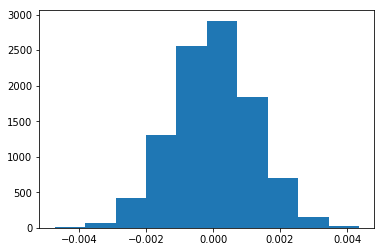

In [82]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [83]:
# Find actual difference in conversion rate in df2:
actual_diff = df2.query("group == 'treatment'").converted.mean() - df2.query("group == 'control'").converted.mean()
actual_diff

-0.0015782389853555567

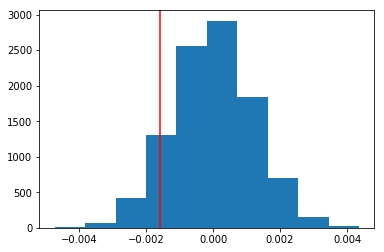

In [84]:
# Plot actual_diffs in p_diff histogram:
plt.hist(p_diffs)
plt.axvline(actual_diff, color = 'red');

In [85]:
# Find proportion of p_diffs that are greater than actual_diff:
p_value = (p_diffs > actual_diff).mean()
p_value.round(2)

0.91000000000000003

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value computed in part l is called 'p-value' which means the probability of obtaining difference in conversion rate at least as extreme as the differences actually observed during the test, given that the null hypothesis is true. Since computed p_value of 0.91 is higher than type I error rate of 0.05, thus we failed to reject the null hypothesis and conclude that there is no difference in conversion rate between old and new landing page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [86]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [87]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' and converted == 1").user_id.count()
convert_new = df2.query("landing_page == 'new_page' and converted == 1").user_id.count()
n_old = df2.query("landing_page == 'old_page'").landing_page.count()
n_new = df2.query("landing_page == 'new_page'").landing_page.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [88]:
# Compute z_test and p_value:
z_test, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], value = 0, alternative = 'smaller')

# Show output:
z_test, p_value.round(2)

(1.3109241984234394, 0.91000000000000003)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Since critical z-test value at 0.05 type I error rate is 1.96, our computed z-test value is less than 1.96 thus we failed to reject the null hypothesis. Also our computed p_value is identical to findings in part j, so we can conclude that there is no difference in conversion rate between old and new landing page same as part j.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression: because outcome = categorical variable (convert/ not convert).**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [89]:
# Add an intercept column, as well as an ab_page column, which is 1 when an individual receives the treatment and 0 if control.
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']

In [90]:
# Display output:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [91]:
# Instantiate regression model and fit the model:
model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [92]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-03-12 09:48 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?

**The p-value associated with ab_page is 0.1899 which different from p-value of 0.91 computed in part 2. The reason that the p-value is different is because our null and hypotheses in logistic regression model is different from part A/B testing. As the goal for this part is to fit the logistic regression model to see if there is a significant difference in conversion based on which page a customer receives. Thus our null and hypothesis in this part should be the following:**

$$H_0: p_{new} - p_{old} = 0 $$


$$H_1: p_{new} - p_{old} ≠ 0 $$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Adding additional factors is a good idea as there are other factors that influence conversion rate as well. However we have to look for multicollinearity as well since independent variables might be highly correlated with one another.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [93]:
# Read in countries.csv and inspect few lines of data:
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [94]:
# Inspect countries data shape:
countries.shape

(290584, 2)

In [95]:
# Inspect countries data more:
# See how many distinct country is in countries dataset:
countries.country.value_counts() # There are 3 distinct countries in this dataset: US, UK and CA.

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [96]:
# Join countries with df2:
new_df = df2.set_index('user_id').join(countries.set_index('user_id'), on = 'user_id')
new_df.head(3)

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US


In [97]:
# Create dummy variable for country column, let 'US' be baseline of country:
new_df[['UK', 'CA']] = pd.get_dummies(new_df['country'])[['UK', 'CA']]
new_df.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,CA
user_id,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0


In [98]:
# Fit logit model to new_df:
model2 = sm.Logit(new_df['converted'], new_df[['intercept', 'ab_page', 'UK', 'CA']]) 
result2 = model2.fit()
result2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-03-12 09:48 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
==================================================================

"""

**Since the p-values of both UK and CA are higher than type I error rate of 0.05, which means that country does not have impact on conversion. Thus we failed to reject null hypothesis and thus conclude that country does not have impact on conversion.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [99]:
# Create additional columns: UK_ab_page and CA_ab_page
new_df['UK_ab_page'] = new_df['ab_page'] * new_df['UK']
new_df['CA_ab_page'] = new_df['ab_page'] * new_df['CA']

# Inspect new_df:
new_df.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,CA,UK_ab_page,CA_ab_page
user_id,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,0,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,0,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,0,0


In [100]:
# Fit logit model to new_df:
model3 = sm.Logit(new_df['converted'], new_df[['intercept', 'ab_page', 'UK', 'CA', 'UK_ab_page', 'CA_ab_page']]) 
result3 = model3.fit()
result3.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-03-12 09:48 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK_ab_page    0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
CA_ab_page   -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
==================================================================

"""

**Since the p-values of both UK_ab_page and CA_ab_page are higher than type I error rate of 0.05, we can conclude that an interaction between page and country does not have significant effects on conversion.**

In [101]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0